In [1]:
import pandas as pd
from FuzzyTM import FLSA_W
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
# import the data
path = '../Assignment-1/Dataset/assignment-2-data.csv'
df_cleaned = pd.read_csv(path)

df_cleaned['new_tokenized'] = df_cleaned['clean_content'].apply(lambda x: x.split())

df_cleaned

id ticker                                              title  \
0     221539    NIO  A Central Bank War Just Started And Its Good F...   
1     221547    NIO         6 Stocks To Watch  Nivida Could Be Falling   
2     221572    NIO  Stocks   Dow Drops Nearly 400 Points as Apple ...   
3     221597   UBER                     The Best Of CES 2020  Revised    
4     221614   UBER                               The Best Of CES 2020   
...      ...    ...                                                ...   
3098  442657    AMD    Here s Why Nvidia  NVDA  Stock Is Gaining Today   
3099  442682    AMD      4 Stocks To Watch Today  ATW  CWEI  MXL  SLCA   
3100  442705    AMD  Here s What The Buy Side Expects From AMD Thur...   
3101  442984      T  Zacks com Featured Highlights  AT T  Nu Skin E...   
3102  442987      T  5 Dividend Growth Stocks To Sail Through Uncer...   

     category                                            content release_date  \
0     opinion  ECB Effects\nThe move in the euro was huge  fa...   2019-03-07   
1     opinion  6 Stocks To Watch  March 6 Trading Session\nSt...   2019-03-06   
2        news  Investing com   A rout in Apple and Facebook  ...   2018-11-19   
3     opinion  With 4 500 companies bringing their innovation...   2020-01-16   
4     opinion  With 4 500 companies bringing their innovation...   2020-01-10   
...       ...                                                ...          ...   
3098  opinion  Shares of Nvidia   NASDAQ NVDA   are up nearly...   2016-09-27   
3099  opinion  It was a pretty good start to the week on Mond...   2016-05-17   
3100  opinion  Advanced Micro Devices Inc   NYSE AMD  is set ...   2014-04-17   
3101  opinion  For Immediate Release\n\nChicago  IL   July 22...   2016-07-21   
3102  opinion  With uncertainty ruling the markets since the ...   2016-07-20   

                       provider  \
0                Michael Kramer   
1                Michael Kramer   
2                 Investing.com   
3     Zacks Investment Research   
4     Zacks Investment Research   
...                         ...   
3098  Zacks Investment Research   
3099                Harry Boxer   
3100                   Estimize   
3101  Zacks Investment Research   
3102  Zacks Investment Research   

                                                    url  article_id  \
0     https://www.investing.com/analysis/a-central-b...   200395687   
1     https://www.investing.com/analysis/6-stocks-to...   200394931   
2     https://www.investing.com/news/stock-market-ne...     1694042   
3     https://www.investing.com/analysis/the-best-of...   200499164   
4     https://www.investing.com/analysis/the-best-of...   200498063   
...                                                 ...         ...   
3098  https://www.investing.com/analysis/here's-why-...   200155860   
3099  https://www.investing.com/analysis/atw,-cwei,-...   200130262   
3100  https://www.investing.com/analysis/here’s-what...      209915   
3101  https://www.investing.com/analysis/zacks.com-f...   200143537   
3102  https://www.investing.com/analysis/5-dividend-...   200143306   

            Date     Open    Close  \
0     2019-03-07  3.77750  3.73150   
1     2019-03-06  3.90400  3.80125   
2     2018-11-19  4.04475  3.61750   
3     2020-01-16  6.19300  6.22325   
4     2020-01-10  6.18325  6.10800   
...          ...      ...      ...   
3098  2016-09-27  1.60225  1.66350   
3099  2016-05-17  1.05000  1.05700   
3100  2014-04-17  0.46050  0.46400   
3101  2016-07-21  1.35250  1.33050   
3102  2016-07-20  1.34250  1.35550   

                                          clean_content  label  \
0     ecb effect move euro huge falling pip huge imp...      0   
1     stock watch march trading session stock stock ...      0   
2     investing com rout apple facebook nasdaq fb mo...      0   
3     company bringing innovation ce jan get really ...      1   
4     company bringing innovation ce jan get really ...      0   
...                  

In [3]:
input_file = df_cleaned['new_tokenized'].to_list()

In [4]:
flsaW = FLSA_W(input_file=input_file, num_topics=10, num_words=10)

print(flsaW.get_vocabulary_size())

pwgt,ptgd = flsaW.get_matrices()

flsaW.show_topics()

for topic in flsaW.show_topics(representation='words'):
  print(topic)

print(flsaW.get_coherence_score())
print(flsaW.get_diversity_score())
print(flsaW.get_interpretability_score())

29908
['nvidia', 'nvda', 'hold', 'nyse', 'key', 'zacks', 'trade', 'rank', 'sector', 'past']
['ounce', 'unchanged', 'philadelphia', 'greenback', 'inbox', 'gainer', 'brent', 'amat', 'nov', 'caterpillar']
['corporation', 'inc', 'gained', 'respectively', 'beat', 'robust', 'solution', 'holding', 'broader', 'investing']
['alv', 'pcg', 'bmwyy', 'icera', 'otcpk', 'nwsa', 'trv', 'nsany', 'foo', 'chee']
['premarket', 'troy', 'smh', 'noel', 'randewich', 'vlkay', 'cac', 'kem', 'kemet', 'unveils']
['stephen', 'depend', 'jensen', 'shifted', 'biology', 'served', 'pile', 'regardless', 'becoming', 'friendly']
['gmt', 'outnumbered', 'settle', 'slumped', 'vaneck', 'adbe', 'senate', 'flashpoint', 'ixic', 'dax']
['book', 'evolution', 'richard', 'creativity', 'synthesis', 'inventing', 'certainty', 'feynman', 'professor', 'pretend']
['theory', 'podcast', 'human', 'century', 'mind', 'author', 'written', 'science', 'old', 'school']
['composite', 'rose', 'reuters', 'chipmaker', 'mu', 'sporting', 'outperformance

In [5]:
num_topics_grid = [2, 3, 4, 5, 10, 15, 20, 30, 40, 50, 75, 100, 125, 150, 200, 250, 300, 500]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

Training FLSA model with num_topics=2
Topics: [(0, '0.0009*"nasdaq" + 0.0009*"nvda" + 0.0008*"nvidia" + 0.0008*"stock" + 0.0008*"company" + 0.0008*"share" + 0.0007*"market" + 0.0007*"top" + 0.0007*"buy" + 0.0007*"nyse"'), (1, '0.0003*"nasdaq" + 0.0003*"company" + 0.0003*"gmt" + 0.0003*"market" + 0.0003*"stock" + 0.0003*"share" + 0.0003*"also" + 0.0002*"year" + 0.0002*"new" + 0.0002*"nvda"')]
Training FLSA model with num_topics=3
Topics: [(0, '0.0002*"company" + 0.0002*"nasdaq" + 0.0002*"premarket" + 0.0002*"market" + 0.0002*"also" + 0.0002*"stock" + 0.0002*"share" + 0.0002*"troy" + 0.0002*"new" + 0.0002*"year"'), (1, '0.0004*"traded" + 0.0004*"ounce" + 0.0004*"nasdaq" + 0.0004*"company" + 0.0004*"performer" + 0.0004*"market" + 0.0004*"stock" + 0.0004*"worst" + 0.0004*"unchanged" + 0.0004*"share"'), (2, '0.0013*"nvda" + 0.0012*"nasdaq" + 0.0012*"nvidia" + 0.0012*"investing" + 0.0011*"corporation" + 0.0011*"com" + 0.0011*"inc" + 0.0011*"stock" + 0.001*"intc" + 0.001*"rank"')]
Training FL

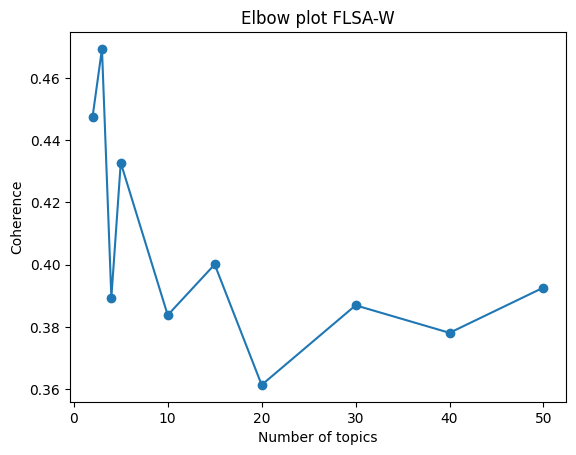

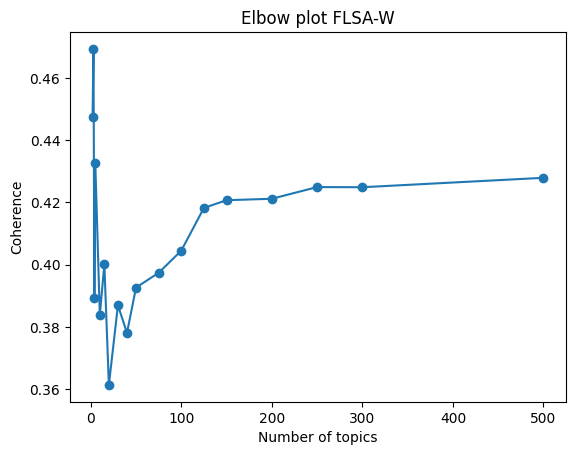

In [6]:
plt.plot(num_topics_grid[:10], coherence_scores[:10], marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

### Iteration 1a

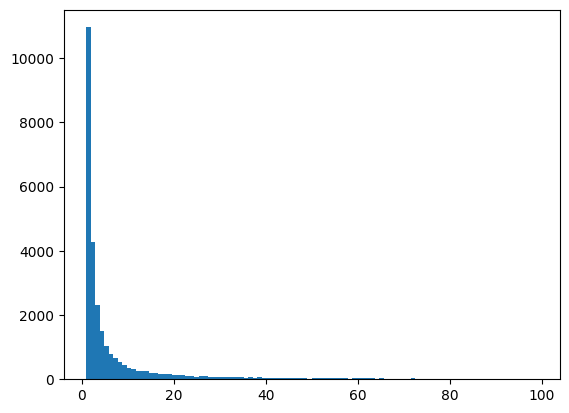

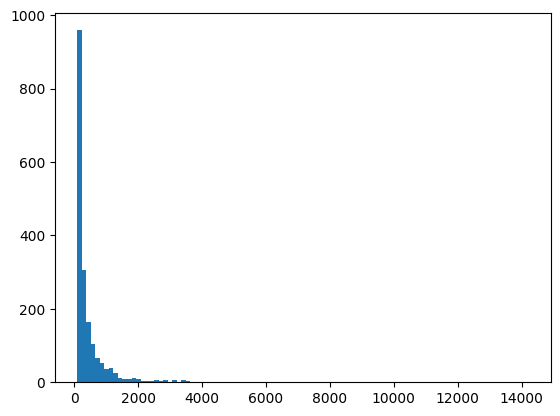

In [7]:
words = [word for list in input_file for word in list]
words, counts = np.unique(words, return_counts=True)

plt.hist(counts[counts<100], bins=100)
plt.show()

plt.hist(counts[counts>100], bins=100)
plt.show()

words_to_filter = words[(counts < 2) | (counts > 4000)]

input_file_ = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

#### Significant reduction in number of words, so new hyperparameter tuning

In [8]:
num_topics_grid = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250, 300]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file_, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

Training FLSA model with num_topics=5
Topics: [(0, '0.0004*"premarket" + 0.0003*"troy" + 0.0002*"wedge" + 0.0002*"cite" + 0.0002*"smh" + 0.0002*"qrvo" + 0.0002*"reiterates" + 0.0002*"vlkay" + 0.0002*"noel" + 0.0002*"randewich"'), (1, '0.0006*"gmt" + 0.0005*"performer" + 0.0005*"outnumbered" + 0.0004*"slumped" + 0.0004*"vector" + 0.0004*"dax" + 0.0004*"advancing" + 0.0004*"aug" + 0.0004*"ounce" + 0.0004*"uncover"'), (2, '0.0022*"nvda" + 0.002*"advanced" + 0.002*"intc" + 0.0019*"released" + 0.0019*"reported" + 0.0019*"point" + 0.0019*"among" + 0.0018*"index" + 0.0018*"rank" + 0.0018*"hold"'), (3, '0.0136*"cause" + 0.0104*"spread" + 0.0096*"death" + 0.0092*"population" + 0.0079*"severe" + 0.0073*"human" + 0.0071*"young" + 0.0071*"disease" + 0.0052*"originated" + 0.005*"spanish"'), (4, '0.0011*"traded" + 0.001*"composite" + 0.001*"reuters" + 0.001*"rose" + 0.0009*"lowest" + 0.0009*"exchange" + 0.0008*"donald" + 0.0008*"chipmaker" + 0.0008*"ltd" + 0.0008*"bell"')]
Training FLSA model with n

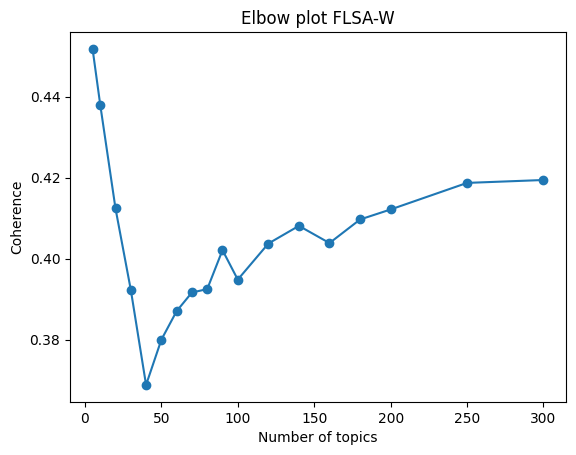

In [9]:
plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

In [10]:
best_num_topics = 100

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file_, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.40215837690139916
Test Diversity Score: 0.999
Test Interpretability Score: 0.4017562185244978
Topics: [(0, '0.0128*"evolutionary" + 0.0124*"church" + 0.0111*"euphoric" + 0.0101*"thaler" + 0.0098*"judgement" + 0.0089*"endless" + 0.0089*"bernie" + 0.0081*"lucky" + 0.0077*"technologically" + 0.0075*"doctoral"'), (1, '0.0312*"quarterly" + 0.03*"moreover" + 0.0248*"previous" + 0.0246*"balance" + 0.0238*"expects" + 0.0187*"debt" + 0.0186*"environment" + 0.0144*"rest" + 0.0142*"increasing" + 0.0137*"income"'), (2, '0.0216*"epidemic" + 0.0195*"respiratory" + 0.0194*"vaccine" + 0.0192*"rader" + 0.0181*"pandemic" + 0.0176*"primatologist" + 0.0176*"mortality" + 0.0176*"polynesian" + 0.0176*"everett" + 0.0176*"colonizing"'), (3, '0.0445*"surely" + 0.0398*"tighter" + 0.035*"biotechnology" + 0.0253*"derail" + 0.025*"linked" + 0.0241*"mathematical" + 0.0232*"100k" + 0.0225*"usa" + 0.0204*"affordable" + 0.0158*"killing"'), (4, '0.0411*"sparked" + 0.0404*"exceeding" + 0.0333*"ge

### Iteration 1b

In [11]:
words = [word for list in input_file for word in list]
words, counts = np.unique(words, return_counts=True)

words_to_filter = words[(counts < 3) | (counts > 4000)]

input_file_ = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

#### Significant reduction in number of words, so new hyperparameter tuning

In [12]:
num_topics_grid = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250, 300]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file_, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

Training FLSA model with num_topics=5
Topics: [(0, '0.0005*"traded" + 0.0005*"performer" + 0.0005*"advancing" + 0.0005*"inbox" + 0.0005*"previously" + 0.0005*"basket" + 0.0005*"philadelphia" + 0.0005*"upbeat" + 0.0005*"unchanged" + 0.0005*"gmt"'), (1, '0.0004*"premarket" + 0.0003*"smh" + 0.0003*"troy" + 0.0003*"thomson" + 0.0003*"conclusively" + 0.0002*"nvda" + 0.0002*"implied" + 0.0002*"mcqueeney" + 0.0002*"cite" + 0.0002*"time"'), (2, '0.0035*"compared" + 0.0035*"graphic" + 0.0035*"gpus" + 0.0034*"basis" + 0.0034*"cash" + 0.0033*"highest" + 0.0033*"non" + 0.0032*"fourth" + 0.0032*"expanding" + 0.0032*"expense"'), (3, '0.0161*"expect" + 0.0154*"generation" + 0.0131*"executive" + 0.013*"gross" + 0.013*"margin" + 0.0126*"half" + 0.0121*"know" + 0.012*"chief" + 0.0118*"think" + 0.0116*"president"'), (4, '0.0016*"corporation" + 0.0015*"gained" + 0.0015*"com" + 0.0014*"nvda" + 0.0014*"corp" + 0.0014*"investing" + 0.0013*"session" + 0.0013*"intc" + 0.0012*"released" + 0.0012*"rising"')]
Tra

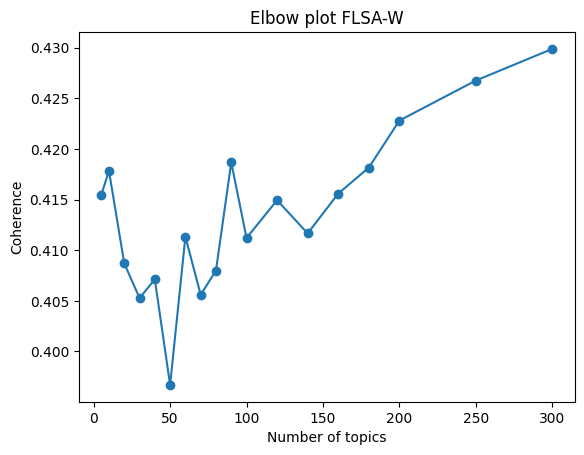

In [13]:
plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

In [14]:
best_num_topics = 100

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file_, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.4052640435482329
Test Diversity Score: 0.999
Test Interpretability Score: 0.4048587795046847
Topics: [(0, '0.0197*"worst" + 0.014*"cboe" + 0.0134*"percent" + 0.0117*"representative" + 0.0112*"selloff" + 0.0109*"elsewhere" + 0.0105*"dji" + 0.0102*"recover" + 0.0097*"boeing" + 0.0092*"congress"'), (1, '0.0039*"stm" + 0.0038*"ssnlf" + 0.0033*"cite" + 0.003*"undertaking" + 0.0028*"divest" + 0.0028*"whisper" + 0.0027*"shade" + 0.0027*"unrestricted" + 0.0026*"reaffirmed" + 0.0025*"redmond"'), (2, '0.056*"excluding" + 0.036*"prepared" + 0.0284*"partially" + 0.0283*"originally" + 0.0278*"remark" + 0.0242*"afternoon" + 0.017*"broadcast" + 0.0166*"excited" + 0.0163*"architecture" + 0.0148*"shortage"'), (3, '0.0061*"hemophilia" + 0.0055*"6x" + 0.005*"equifax" + 0.0049*"playstation" + 0.0048*"expe" + 0.0047*"elite" + 0.0044*"stringent" + 0.0044*"muscular" + 0.0044*"leukemia" + 0.0044*"dystrophy"'), (4, '0.0048*"nearing" + 0.0035*"setup" + 0.0035*"locker" + 0.0034*"sustainab

### Iteration 1c

In [15]:
words = [word for list in input_file for word in list]
words, counts = np.unique(words, return_counts=True)

words_to_filter = words[(counts < 5) | (counts > 4000)]

input_file_ = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

#### Significant reduction in number of words, so new hyperparameter tuning

In [16]:
num_topics_grid = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250, 300]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file_, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

Training FLSA model with num_topics=5
Topics: [(0, '0.0167*"generation" + 0.0166*"expect" + 0.0143*"margin" + 0.0138*"executive" + 0.0136*"gross" + 0.0132*"half" + 0.0127*"know" + 0.0125*"chief" + 0.0123*"think" + 0.012*"server"'), (1, '0.0005*"premarket" + 0.0003*"thomson" + 0.0003*"smh" + 0.0003*"avoided" + 0.0003*"conclusively" + 0.0003*"gmt" + 0.0003*"strategiesit" + 0.0003*"mcqueeney" + 0.0003*"soxx" + 0.0003*"uncover"'), (2, '0.0018*"corporation" + 0.0017*"nvda" + 0.0016*"investing" + 0.0016*"com" + 0.0016*"gained" + 0.0015*"intc" + 0.0015*"released" + 0.0015*"corp" + 0.0014*"note" + 0.0014*"read"'), (3, '0.0038*"compared" + 0.0037*"graphic" + 0.0036*"cash" + 0.0036*"gpus" + 0.0036*"fourth" + 0.0036*"basis" + 0.0036*"ago" + 0.0035*"non" + 0.0035*"segment" + 0.0035*"computing"'), (4, '0.0006*"previously" + 0.0006*"ltd" + 0.0006*"traded" + 0.0005*"inbox" + 0.0005*"amat" + 0.0005*"ratio" + 0.0005*"nov" + 0.0005*"cryptocurrency" + 0.0005*"contract" + 0.0005*"reuters"')]
Training FLSA

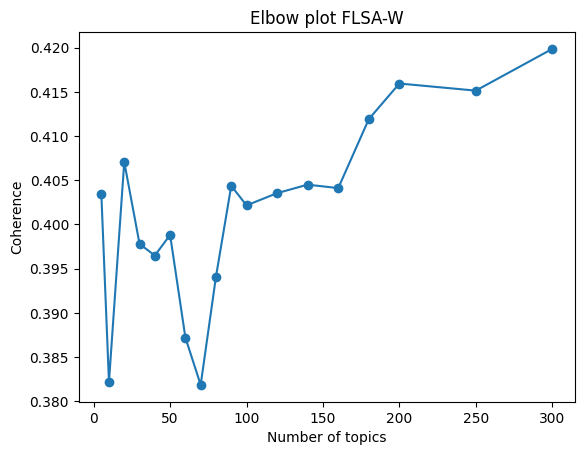

In [17]:
plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

In [18]:
best_num_topics = 100

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file_, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.39568055142110564
Test Diversity Score: 0.999
Test Interpretability Score: 0.39528487086968456
Topics: [(0, '0.0354*"record" + 0.0294*"operation" + 0.0262*"guidance" + 0.0254*"drive" + 0.0244*"anything" + 0.0232*"competitor" + 0.019*"previous" + 0.0178*"moreover" + 0.0178*"expects" + 0.0151*"build"'), (1, '0.0052*"brokerage" + 0.0044*"bolstered" + 0.0041*"atvi" + 0.0041*"pedestrian" + 0.004*"jeremy" + 0.0039*"inventor" + 0.0039*"translate" + 0.0039*"flurry" + 0.0039*"preceding" + 0.0038*"repatriation"'), (2, '0.0296*"gaining" + 0.0268*"design" + 0.0234*"ended" + 0.0227*"sport" + 0.0223*"positioned" + 0.0209*"series" + 0.0204*"stronger" + 0.0192*"began" + 0.0187*"efficiency" + 0.0183*"flat"'), (3, '0.0159*"mu" + 0.014*"reuters" + 0.0123*"widely" + 0.0116*"movement" + 0.0103*"formed" + 0.01*"podcast" + 0.0098*"wrong" + 0.0096*"usually" + 0.0092*"table" + 0.0089*"chain"'), (4, '0.0104*"averaged" + 0.0095*"advancement" + 0.0094*"flexibility" + 0.0078*"accelerating" 

### Iteration 1d

In [19]:
words = [word for list in input_file for word in list]
words, counts = np.unique(words, return_counts=True)

words_to_filter = words[(counts < 2) | (counts > 2000)]

input_file_ = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

#### Significant reduction in number of words, so new hyperparameter tuning

In [20]:
num_topics_grid = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250, 300]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file_, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

Training FLSA model with num_topics=5
Topics: [(0, '0.0003*"wedge" + 0.0003*"premarket" + 0.0003*"reiterates" + 0.0003*"qrvo" + 0.0002*"xsd" + 0.0002*"cite" + 0.0002*"cy" + 0.0002*"alv" + 0.0002*"vlkay" + 0.0002*"aftermarket"'), (1, '0.0008*"gmt" + 0.0005*"outnumbered" + 0.0005*"troy" + 0.0004*"advancer" + 0.0004*"jinping" + 0.0004*"decliners" + 0.0004*"implied" + 0.0004*"vaneck" + 0.0004*"sept" + 0.0003*"nearing"'), (2, '0.0014*"reuters" + 0.0014*"exchange" + 0.0013*"rose" + 0.0013*"composite" + 0.0012*"fell" + 0.0012*"jones" + 0.0012*"chipmaker" + 0.0011*"dow" + 0.0011*"session" + 0.0011*"hottest"'), (3, '0.0025*"com" + 0.0024*"advanced" + 0.0023*"released" + 0.0022*"street" + 0.0021*"reported" + 0.0021*"special" + 0.0021*"among" + 0.0021*"rally" + 0.0021*"rising" + 0.0021*"believe"'), (4, '0.0008*"ounce" + 0.0007*"philadelphia" + 0.0007*"unchanged" + 0.0007*"towards" + 0.0007*"gainer" + 0.0007*"bidu" + 0.0007*"brent" + 0.0006*"greenback" + 0.0006*"warned" + 0.0006*"inbox"')]
Trainin

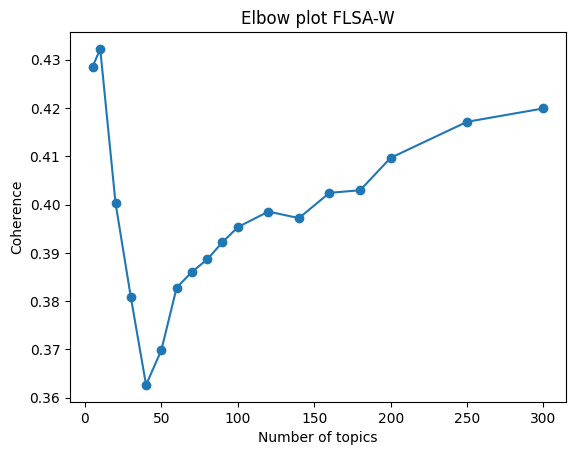

In [21]:
plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

In [22]:
best_num_topics = 100

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file_, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.39040950397950236
Test Diversity Score: 0.999
Test Interpretability Score: 0.39001909447552285
Topics: [(0, '0.0334*"investing" + 0.018*"ai" + 0.0169*"experience" + 0.0158*"tool" + 0.0154*"bad" + 0.0149*"response" + 0.0142*"option" + 0.013*"tuesday" + 0.0117*"morning" + 0.0116*"model"'), (1, '0.0097*"percent" + 0.009*"cryptocurrencies" + 0.0085*"earn" + 0.0078*"cboe" + 0.0069*"cryptocurrency" + 0.0068*"corner" + 0.0067*"landscape" + 0.0065*"citing" + 0.0064*"valued" + 0.0063*"evolving"'), (2, '0.0094*"thomas" + 0.0087*"rogue" + 0.0084*"controversial" + 0.0081*"dan" + 0.0079*"tale" + 0.0074*"ocean" + 0.0069*"unfolding" + 0.0066*"paragraph" + 0.0064*"nail" + 0.0062*"ignoring"'), (3, '0.0032*"iwm" + 0.003*"mcmoran" + 0.0029*"soybean" + 0.0029*"daimler" + 0.0028*"freeport" + 0.0026*"dependency" + 0.0025*"calmed" + 0.0024*"bourse" + 0.0024*"cop" + 0.0024*"lvs"'), (4, '0.0023*"alv" + 0.0023*"chee" + 0.0023*"foo" + 0.0023*"pcg" + 0.002*"icera" + 0.0019*"vlastelica" + 0

### Iteration 1e

In [23]:
words = [word for list in input_file for word in list]
words, counts = np.unique(words, return_counts=True)

words_to_filter = words[(counts < 3) | (counts > 2000)]

input_file_ = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

#### Significant reduction in number of words, so new hyperparameter tuning

In [24]:
num_topics_grid = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250, 300]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file_, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

Training FLSA model with num_topics=5
Topics: [(0, '0.004*"graphic" + 0.0038*"gpus" + 0.0038*"cash" + 0.0037*"compared" + 0.0037*"highest" + 0.0037*"basis" + 0.0037*"fourth" + 0.0036*"expanding" + 0.0036*"non" + 0.0035*"operating"'), (1, '0.0173*"expect" + 0.0161*"generation" + 0.014*"gross" + 0.014*"executive" + 0.0135*"half" + 0.0133*"margin" + 0.013*"know" + 0.0129*"chief" + 0.0126*"think" + 0.0125*"president"'), (2, '0.0005*"traded" + 0.0005*"performer" + 0.0005*"advancing" + 0.0005*"inbox" + 0.0005*"unchanged" + 0.0005*"philadelphia" + 0.0005*"gainer" + 0.0005*"basket" + 0.0005*"upbeat" + 0.0005*"towards"'), (3, '0.0004*"premarket" + 0.0003*"troy" + 0.0003*"smh" + 0.0003*"thomson" + 0.0003*"implied" + 0.0003*"conclusively" + 0.0002*"mcqueeney" + 0.0002*"cite" + 0.0002*"nellis" + 0.0002*"delve"'), (4, '0.0016*"corporation" + 0.0015*"gained" + 0.0014*"corp" + 0.0014*"com" + 0.0014*"session" + 0.0013*"investing" + 0.0013*"intc" + 0.0012*"released" + 0.0012*"read" + 0.0012*"lost"')]
T

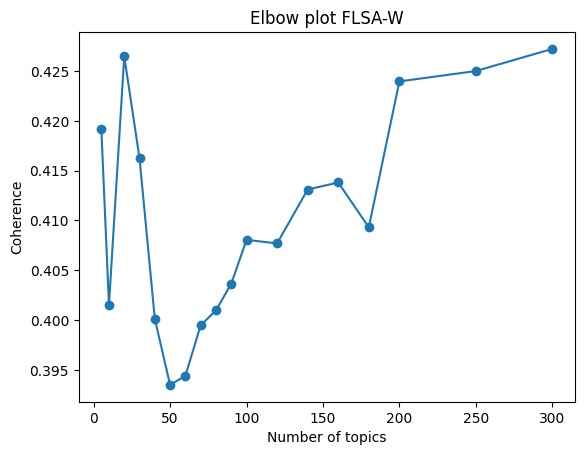

In [25]:
plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

In [26]:
best_num_topics = 100

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file_, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.40913694272960144
Test Diversity Score: 0.998
Test Interpretability Score: 0.40831866884414225
Topics: [(0, '0.0102*"swing" + 0.0086*"row" + 0.0073*"stable" + 0.007*"topping" + 0.0066*"9339past" + 0.0061*"sq" + 0.006*"discretionary" + 0.006*"breach" + 0.0059*"cell" + 0.0052*"surface"'), (1, '0.0088*"loser" + 0.0082*"downtrend" + 0.0067*"walt" + 0.0066*"presented" + 0.0063*"filled" + 0.0063*"payroll" + 0.0058*"investigating" + 0.0058*"settled" + 0.0053*"jwn" + 0.0053*"tgt"'), (2, '0.0207*"ounce" + 0.0156*"nikkei" + 0.0114*"brent" + 0.0108*"ftse" + 0.0098*"msci" + 0.0092*"stoxx" + 0.0088*"surely" + 0.0086*"moderate" + 0.0081*"emergency" + 0.0078*"sparked"'), (3, '0.0213*"corp" + 0.0173*"value" + 0.0172*"produce" + 0.0171*"trillion" + 0.0169*"jump" + 0.0152*"retailer" + 0.015*"edge" + 0.0141*"field" + 0.0139*"valuation" + 0.0127*"cap"'), (4, '0.0551*"ramp" + 0.0449*"standpoint" + 0.041*"lisa" + 0.0336*"rome" + 0.0335*"thank" + 0.0314*"officer" + 0.0309*"custom" + 0

### Iteration 1f

In [27]:
words = [word for list in input_file for word in list]
words, counts = np.unique(words, return_counts=True)

words_to_filter = words[(counts < 5) | (counts > 2000)]

input_file_ = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

#### Significant reduction in number of words, so new hyperparameter tuning

In [28]:
num_topics_grid = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250, 300]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file_, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

Training FLSA model with num_topics=5
Topics: [(0, '0.0045*"graphic" + 0.0043*"fourth" + 0.0043*"cash" + 0.0041*"gpus" + 0.0041*"expanding" + 0.004*"non" + 0.004*"ago" + 0.004*"operating" + 0.0039*"compared" + 0.0039*"basis"'), (1, '0.0182*"expect" + 0.0179*"generation" + 0.0151*"executive" + 0.015*"gross" + 0.0145*"margin" + 0.0144*"half" + 0.014*"know" + 0.0139*"chief" + 0.0135*"think" + 0.0128*"president"'), (2, '0.0006*"traded" + 0.0006*"previously" + 0.0006*"ltd" + 0.0005*"inbox" + 0.0005*"amat" + 0.0005*"ratio" + 0.0005*"nov" + 0.0005*"advancing" + 0.0005*"cryptocurrency" + 0.0005*"bidu"'), (3, '0.0018*"corporation" + 0.0016*"investing" + 0.0016*"gained" + 0.0016*"com" + 0.0015*"corp" + 0.0015*"intc" + 0.0014*"released" + 0.0014*"rising" + 0.0014*"read" + 0.0014*"note"'), (4, '0.0005*"premarket" + 0.0003*"thomson" + 0.0003*"gmt" + 0.0003*"troy" + 0.0003*"smh" + 0.0003*"implied" + 0.0003*"conclusively" + 0.0003*"avoided" + 0.0003*"strategiesit" + 0.0003*"mcqueeney"')]
Training FLS

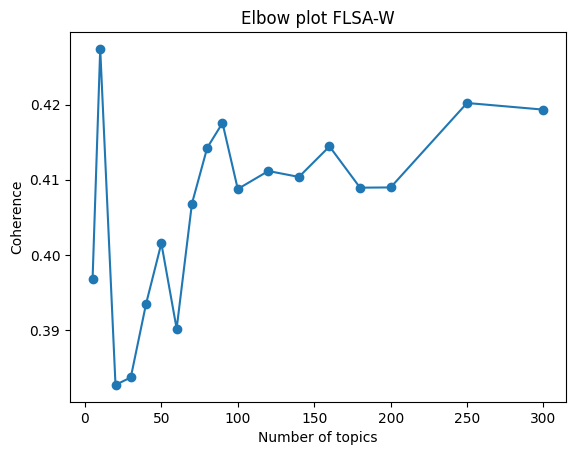

In [29]:
plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

In [30]:
best_num_topics = 100

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file_, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.4136888297743069
Test Diversity Score: 0.999
Test Interpretability Score: 0.41327514094453255
Topics: [(0, '0.0054*"soxs" + 0.0048*"recommends" + 0.0048*"canaccord" + 0.0047*"coil" + 0.0046*"nuan" + 0.0045*"proai" + 0.0044*"genuity" + 0.0043*"otcpk" + 0.0043*"cala" + 0.004*"wbc"'), (1, '0.0152*"remarkable" + 0.0142*"instrument" + 0.0124*"proven" + 0.0103*"ev" + 0.0101*"visual" + 0.01*"sox" + 0.0098*"taiwan" + 0.0097*"named" + 0.0091*"skyrocketing" + 0.0087*"score"'), (2, '0.0209*"name" + 0.0184*"weakness" + 0.0181*"volume" + 0.0173*"reach" + 0.0164*"equipment" + 0.0152*"relatively" + 0.0147*"watch" + 0.0146*"considering" + 0.0146*"board" + 0.0143*"agreement"'), (3, '0.0522*"win" + 0.0491*"sheet" + 0.0467*"net" + 0.0286*"non" + 0.0284*"expense" + 0.0284*"rest" + 0.0259*"credit" + 0.0255*"flow" + 0.0243*"america" + 0.0195*"basis"'), (4, '0.0532*"merrill" + 0.0462*"lynch" + 0.0448*"jefferies" + 0.0403*"workload" + 0.0314*"seven" + 0.0268*"moore" + 0.0259*"journey" 

### Iteration 1g

In [31]:
words = [word for list in input_file for word in list]
words, counts = np.unique(words, return_counts=True)

words_to_filter = words[(counts < 2) | (counts > 1000)]

input_file_ = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

#### Significant reduction in number of words, so new hyperparameter tuning

In [32]:
num_topics_grid = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250, 300]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file_, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

Training FLSA model with num_topics=5
Topics: [(0, '0.0007*"gmt" + 0.0006*"performer" + 0.0006*"outnumbered" + 0.0005*"slumped" + 0.0005*"uncover" + 0.0005*"esp" + 0.0004*"vector" + 0.0004*"incorporated" + 0.0004*"dax" + 0.0004*"wondrous"'), (1, '0.0146*"cause" + 0.0113*"spread" + 0.0105*"death" + 0.0101*"population" + 0.0087*"severe" + 0.0077*"disease" + 0.0074*"young" + 0.007*"human" + 0.0058*"originated" + 0.0056*"spanish"'), (2, '0.0012*"traded" + 0.001*"composite" + 0.001*"lowest" + 0.0009*"reuters" + 0.0009*"donald" + 0.0009*"ltd" + 0.0009*"previously" + 0.0009*"worst" + 0.0009*"barrel" + 0.0008*"elsewhere"'), (3, '0.0004*"premarket" + 0.0004*"troy" + 0.0003*"smh" + 0.0003*"wedge" + 0.0003*"cite" + 0.0003*"qrvo" + 0.0002*"reiterates" + 0.0002*"vlkay" + 0.0002*"polled" + 0.0002*"kem"'), (4, '0.0021*"investing" + 0.0019*"broader" + 0.0019*"intc" + 0.0018*"released" + 0.0018*"rising" + 0.0018*"believe" + 0.0017*"among" + 0.0017*"meanwhile" + 0.0017*"bottom" + 0.0017*"four"')]
Traini

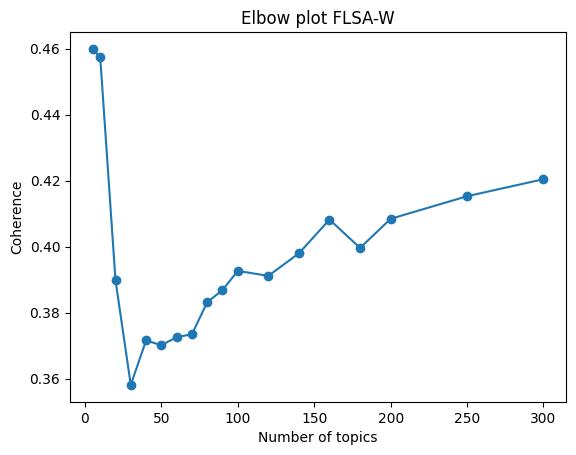

In [33]:
plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

In [34]:
best_num_topics = 100

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file_, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.3800715624564064
Test Diversity Score: 1.0
Test Interpretability Score: 0.3800715624564064
Topics: [(0, '0.0419*"jim" + 0.0368*"40" + 0.0324*"jumping" + 0.0314*"roundup" + 0.0239*"named" + 0.0238*"rolling" + 0.0216*"surging" + 0.0204*"spike" + 0.0204*"die" + 0.0198*"essential"'), (1, '0.007*"premarket" + 0.003*"overshadowed" + 0.003*"oxy" + 0.0029*"skyworks" + 0.0028*"smh" + 0.0027*"altria" + 0.0026*"lululemon" + 0.0024*"stressed" + 0.0024*"thisthe" + 0.0024*"6b"'), (2, '0.0069*"angry" + 0.0065*"doomed" + 0.0064*"harnessing" + 0.006*"attempted" + 0.0058*"roger" + 0.0054*"tree" + 0.0053*"attendee" + 0.005*"opponent" + 0.0049*"genomics" + 0.0045*"supremacy"'), (3, '0.0027*"asml" + 0.002*"176" + 0.002*"p100" + 0.0018*"inbound" + 0.0018*"stagnating" + 0.0018*"subjected" + 0.0017*"4q" + 0.0017*"572" + 0.0017*"initiation" + 0.0016*"ycharts"'), (4, '0.0344*"released" + 0.031*"intelligence" + 0.0249*"msft" + 0.0249*"date" + 0.0243*"nothing" + 0.0231*"find" + 0.0224*"bel

### Iteration 1h

In [35]:
words = [word for list in input_file for word in list]
words, counts = np.unique(words, return_counts=True)

words_to_filter = words[(counts < 3) | (counts > 1000)]

input_file_ = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

#### Significant reduction in number of words, so new hyperparameter tuning

In [36]:
num_topics_grid = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250, 300]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file_, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

Training FLSA model with num_topics=5
Topics: [(0, '0.0007*"gmt" + 0.0006*"performer" + 0.0005*"outnumbered" + 0.0005*"slumped" + 0.0005*"vector" + 0.0005*"incorporated" + 0.0005*"advancing" + 0.0005*"inched" + 0.0004*"esp" + 0.0004*"rated"'), (1, '0.0149*"expect" + 0.0139*"generation" + 0.0125*"half" + 0.0123*"president" + 0.0111*"executive" + 0.0108*"gross" + 0.0108*"processor" + 0.0107*"seven" + 0.0105*"server" + 0.0101*"driven"'), (2, '0.0013*"traded" + 0.0009*"ltd" + 0.0009*"reuters" + 0.0009*"worst" + 0.0009*"bell" + 0.0009*"composite" + 0.0009*"previously" + 0.0009*"chipmakers" + 0.0008*"mu" + 0.0008*"york"'), (3, '0.0022*"investing" + 0.0021*"intc" + 0.0019*"respectively" + 0.0018*"rising" + 0.0018*"released" + 0.0017*"added" + 0.0017*"bottom" + 0.0017*"boost" + 0.0017*"trend" + 0.0017*"following"'), (4, '0.0005*"premarket" + 0.0004*"smh" + 0.0003*"troy" + 0.0003*"cite" + 0.0003*"conclusively" + 0.0003*"polled" + 0.0003*"wedge" + 0.0003*"qrvo" + 0.0003*"kemet" + 0.0003*"kem"')]

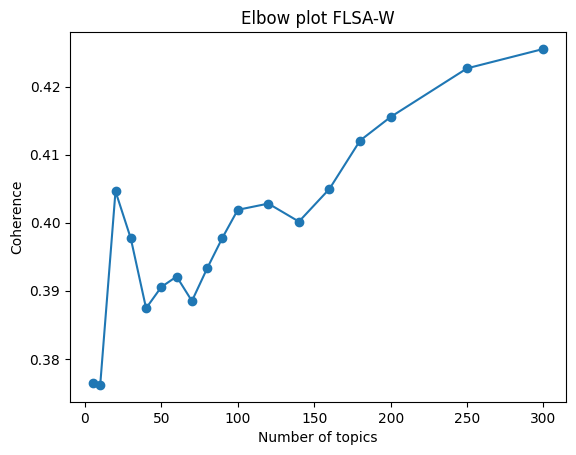

In [37]:
plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

In [38]:
best_num_topics = 100

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file_, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.3933994534033552
Test Diversity Score: 0.997
Test Interpretability Score: 0.39221925504314514
Topics: [(0, '0.055*"ramp" + 0.0463*"standpoint" + 0.0422*"lisa" + 0.0343*"thank" + 0.0331*"rome" + 0.0327*"officer" + 0.0292*"laura" + 0.0286*"custom" + 0.0282*"treasurer" + 0.0279*"stacy"'), (1, '0.041*"q1" + 0.037*"400" + 0.0339*"teen" + 0.0333*"expecting" + 0.0318*"sequential" + 0.028*"approximately" + 0.0253*"hey" + 0.0214*"softer" + 0.0202*"zen" + 0.0196*"priority"'), (2, '0.0046*"dampened" + 0.0036*"aiming" + 0.0034*"advertisement" + 0.0033*"concrete" + 0.003*"outperformers" + 0.003*"analyzing" + 0.003*"imf" + 0.0028*"mercedes" + 0.0027*"robinson" + 0.0026*"calmed"'), (3, '0.0268*"host" + 0.0217*"adjusted" + 0.0196*"pro" + 0.0189*"300" + 0.017*"perspective" + 0.0166*"intensive" + 0.0165*"feeling" + 0.0147*"supported" + 0.0137*"gap" + 0.0135*"suggests"'), (4, '0.0126*"surrounding" + 0.0125*"slipped" + 0.0096*"james" + 0.0095*"household" + 0.0093*"difficulty" + 0.0

### Iteration 1i

In [39]:
words = [word for list in input_file for word in list]
words, counts = np.unique(words, return_counts=True)

words_to_filter = words[(counts < 5) | (counts > 1000)]

input_file_ = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

#### Significant reduction in number of words, so new hyperparameter tuning

In [40]:
num_topics_grid = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250, 300]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file_, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

Training FLSA model with num_topics=5
Topics: [(0, '0.0005*"premarket" + 0.0005*"troy" + 0.0004*"gmt" + 0.0004*"implied" + 0.0004*"thomson" + 0.0003*"smh" + 0.0003*"conclusively" + 0.0003*"avoided" + 0.0003*"soxx" + 0.0003*"strategiesit"'), (1, '0.0055*"fourth" + 0.005*"expanding" + 0.0048*"primarily" + 0.0047*"gpu" + 0.0047*"gpus" + 0.0044*"opportunity" + 0.0044*"income" + 0.0044*"sachs" + 0.0043*"pc" + 0.0042*"client"'), (2, '0.0207*"expect" + 0.0196*"generation" + 0.0172*"executive" + 0.0169*"gross" + 0.0162*"half" + 0.0161*"know" + 0.016*"chief" + 0.0153*"think" + 0.015*"president" + 0.0146*"question"'), (3, '0.0016*"session" + 0.0015*"investing" + 0.0015*"intc" + 0.0014*"respectively" + 0.0014*"released" + 0.0014*"surged" + 0.0013*"rising" + 0.0013*"read" + 0.0013*"boost" + 0.0013*"note"'), (4, '0.0006*"traded" + 0.0006*"previously" + 0.0006*"inbox" + 0.0006*"amat" + 0.0005*"nov" + 0.0005*"ratio" + 0.0005*"advancing" + 0.0005*"philadelphia" + 0.0005*"ltd" + 0.0005*"proven"')]
Trai

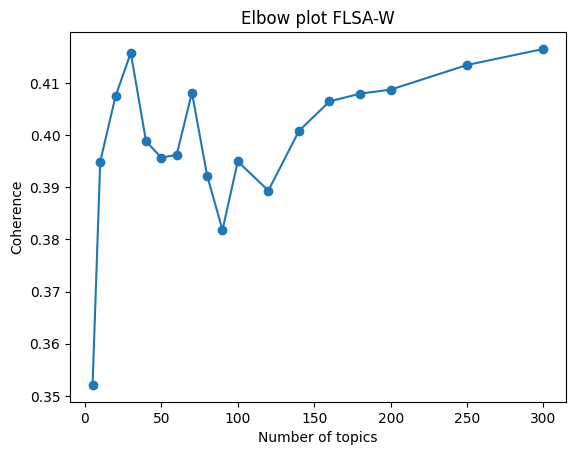

In [41]:
plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

In [42]:
best_num_topics = 100

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file_, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.3889753242956693
Test Diversity Score: 1.0
Test Interpretability Score: 0.3889753242956693
Topics: [(0, '0.0192*"nikkei" + 0.0181*"ftse" + 0.0156*"ounce" + 0.0153*"yuan" + 0.0145*"wti" + 0.0137*"msci" + 0.0132*"dragged" + 0.0119*"turkey" + 0.0112*"stoxx" + 0.0108*"at40"'), (1, '0.044*"include" + 0.043*"amzn" + 0.0382*"set" + 0.035*"along" + 0.0329*"become" + 0.0323*"every" + 0.0307*"nearly" + 0.0292*"called" + 0.0273*"interest" + 0.0259*"run"'), (2, '0.0103*"baidu" + 0.01*"crypto" + 0.0088*"hence" + 0.0083*"bode" + 0.0079*"numerous" + 0.0078*"lagged" + 0.0078*"capture" + 0.0077*"boom" + 0.0074*"exceptional" + 0.0074*"contributing"'), (3, '0.0269*"following" + 0.0252*"artificial" + 0.0231*"worth" + 0.022*"helped" + 0.0218*"added" + 0.0201*"internet" + 0.0197*"network" + 0.0191*"leader" + 0.0183*"actual" + 0.0174*"rising"'), (4, '0.0052*"crus" + 0.0049*"apr" + 0.0044*"ipg" + 0.0044*"mizuho" + 0.0043*"cirrus" + 0.0039*"sk" + 0.0038*"breakeven" + 0.0038*"recap" + 0.

#### The sub-iteration with the highest coherence: 1b

In [43]:
words = [word for list in input_file for word in list]
words, counts = np.unique(words, return_counts=True)

words_to_filter = words[(counts < 3) | (counts > 4000)]

input_file = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

### Iteration 2

In [44]:
best_num_topics = 100

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.41050348605083703
Test Diversity Score: 0.999
Test Interpretability Score: 0.4100929825647862
Topics: [(0, '0.026*"bandwidth" + 0.0232*"poll" + 0.0205*"handy" + 0.02*"logged" + 0.0193*"800" + 0.0188*"normalize" + 0.0187*"spanning" + 0.0167*"indicative" + 0.0143*"roadmap" + 0.0135*"epic"'), (1, '0.0103*"probable" + 0.0096*"awaiting" + 0.0096*"missile" + 0.0095*"deputy" + 0.009*"aussie" + 0.0088*"joking" + 0.0088*"mild" + 0.0087*"chicken" + 0.0086*"nassim" + 0.0084*"gloom"'), (2, '0.0031*"kramer" + 0.0028*"tremendously" + 0.0028*"stricter" + 0.0028*"embraced" + 0.0027*"spate" + 0.0025*"jacob" + 0.0025*"velodyne" + 0.0024*"squeezed" + 0.0024*"vlkay" + 0.0024*"ascent"'), (3, '0.0085*"uptick" + 0.0083*"automaker" + 0.0078*"advisor" + 0.0073*"unfortunately" + 0.0067*"apply" + 0.0066*"historical" + 0.0063*"speaks" + 0.0061*"slowly" + 0.0061*"logistics" + 0.006*"ratio"'), (4, '0.0131*"unchanged" + 0.009*"pharmaceutical" + 0.0086*"recovered" + 0.0082*"reversal" + 0.0077*

### Iteration 3

In [45]:
number_pattern = re.compile(r'.*\d')

input_file = [[s for s in sublist if not number_pattern.match(s)] for sublist in input_file]

In [46]:
best_num_topics = 100

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.40425309314346175
Test Diversity Score: 1.0
Test Interpretability Score: 0.40425309314346175
Topics: [(0, '0.055*"ramp" + 0.0485*"standpoint" + 0.0408*"lisa" + 0.0332*"thank" + 0.0317*"rome" + 0.0304*"officer" + 0.0288*"custom" + 0.0285*"yeah" + 0.0282*"laura" + 0.0273*"treasurer"'), (1, '0.0102*"phlx" + 0.0082*"meaningful" + 0.007*"bidu" + 0.0069*"square" + 0.0058*"inbox" + 0.0054*"committed" + 0.0054*"proved" + 0.0053*"outpacing" + 0.0053*"managing" + 0.0052*"snapchat"'), (2, '0.0046*"symantec" + 0.0045*"compiled" + 0.0044*"sole" + 0.0041*"trim" + 0.004*"viable" + 0.0038*"invented" + 0.0038*"citi" + 0.0037*"matthew" + 0.0036*"craze" + 0.0033*"continental"'), (3, '0.013*"avoided" + 0.0096*"grid" + 0.0085*"ray" + 0.0084*"aforementioned" + 0.0079*"optical" + 0.0077*"controller" + 0.0072*"proliferation" + 0.0069*"optimal" + 0.0067*"battlefield" + 0.0066*"strategiesit"'), (4, '0.0428*"sell" + 0.039*"top" + 0.0384*"three" + 0.0344*"service" + 0.0324*"however" + 0.03

### Iteration 4

In [47]:
words_to_filter = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']

input_file = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

In [48]:
best_num_topics = 100

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file, num_topics=best_num_topics, num_words=20)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.47731296011731644
Test Diversity Score: 0.985
Test Interpretability Score: 0.4701532657155567
Topics: [(0, '0.0195*"chipmaker" + 0.0143*"hottest" + 0.0134*"consistent" + 0.0134*"designed" + 0.0133*"rival" + 0.0132*"electronics" + 0.013*"familiar" + 0.0127*"healthy" + 0.0126*"plenty" + 0.0122*"stellar" + 0.0118*"priced" + 0.0117*"german" + 0.0108*"indicates" + 0.0101*"climb" + 0.01*"catch" + 0.0093*"integration" + 0.0087*"section" + 0.0085*"phenomenon" + 0.0085*"channel" + 0.0081*"remained"'), (1, '0.0037*"cy" + 0.0036*"ssg" + 0.0031*"mott" + 0.0028*"br" + 0.0028*"ctrl" + 0.0027*"simulate" + 0.0026*"na" + 0.0026*"amba" + 0.0026*"supplied" + 0.0026*"ddd" + 0.0026*"rankintel" + 0.0025*"extr" + 0.0024*"lifecycle" + 0.0022*"fortifying" + 0.0022*"slim" + 0.0021*"empowering" + 0.0021*"linegiven" + 0.0021*"nvida" + 0.0021*"outlay" + 0.002*"legitimize"'), (2, '0.0052*"midday" + 0.0045*"slumped" + 0.0044*"signaling" + 0.0039*"id" + 0.0039*"accident" + 0.0038*"mart" + 0.00